<a href="https://colab.research.google.com/github/Devarsh1302/Task_1/blob/main/Task_1_Devarsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **Loading the dataset**

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
print("Basic Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Basic Info:
 None

Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.5230

# **Handling missing values**

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-4-6e16b585ea01>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-6e16b585ea01>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

# **Encode categorical variables**

In [ ]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# **Drop columns not needed**

In [ ]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


# Feature **scaling**

In [ ]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# **Visualize outliers**

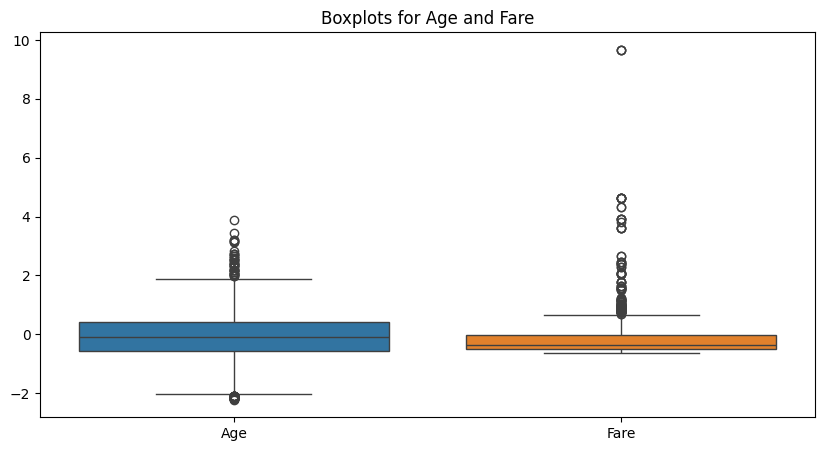

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplots for Age and Fare")
plt.show()

# **Optionally remove outliers (Z-score or IQR)**

In [ ]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR)))]

# **Final dataset**

In [ ]:
print("\nCleaned Dataset:\n", df.head())


Cleaned Dataset:
    Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         0       3    1 -0.565736      1      0 -0.502445         2
2         1       3    0 -0.258337      0      0 -0.488854         2
3         1       1    0  0.433312      1      0  0.420730         2
4         0       3    1  0.433312      0      0 -0.486337         2
5         0       3    1 -0.104637      0      0 -0.478116         1
